In [3]:
%pip install pyEDM statsmodels numba
%pip install git+https://github.com/manu-mannattil/nolitsa.git

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/2c/31/121c11175e49482ef5f8472966f15a02054082c33de6e6a5ca5e59aef3ae/numba-0.58.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/79/26/50423498efeca0bf422a0f6d7d5795324403595c15069d35824e8a75732e/llvmlite-0.41.0-cp39-cp39-win_amd64.whl (28.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.41.0 requires cloudpickle, which is not installed.
shap 0.41.0 requires slicer==0.0.7, which is not installed.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Cloning https://github.com/manu-mannattil/nolitsa.git to c:\users\fangy\appdata\local\temp\pip-req-build-m0c181e9
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 0e3cfd59c82c21c42da55cd24ee944b44aa0d9ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git 'C:\Users\fangy\AppData\Local\Temp\pip-req-build-m0c181e9'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyEDM as pyedm

from nolitsa import lyapunov
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from gulf.dolphindb import BondDB

db = BondDB()

[Dolphindb] Connect to 192.168.0.104:8848
[Dolphindb] Table exist. No create, db_path:dfs://bond_daily_code, table_name: bond_daily_table


In [6]:
df = db.get_bond_daily_table_df(start_date='2020.01.01', jj_code_list=['SHSE.113578']).dropna()
df.insert(loc=0, column='Time', value=range(len(df)))
df

,Time,jj_code,bond_name,stock_name,trade_date,securityid,open,high,low,close,...,amount,pct_chg,vwap,bond_scale,trans_stock_premium,duallow,indclass,stock_cshare,stock_tshare,stock_nav
1,0,SHSE.113578,全筑转债,*ST全筑,2020-05-20,603030,112.110,112.880,110.210,110.580,...,1.237240e+10,-1.662961,113.057730,3.033,-0.385667,110.194333,装修装饰,580122820.0,580122820.0,-0.388607
2,1,SHSE.113578,全筑转债,*ST全筑,2020-05-21,603030,110.590,112.000,110.170,111.640,...,4.563655e+09,0.958582,112.945477,3.033,-0.357468,111.282532,装修装饰,580122820.0,580122820.0,-0.388607
3,2,SHSE.113578,全筑转债,*ST全筑,2020-05-22,603030,111.000,112.050,108.800,108.880,...,1.202389e+10,-2.472232,112.511512,3.033,-0.364204,108.515796,装修装饰,580122820.0,580122820.0,-0.388607
4,3,SHSE.113578,全筑转债,*ST全筑,2020-05-25,603030,109.000,110.140,108.520,109.950,...,1.839712e+09,0.982733,112.447388,3.033,-0.349649,109.600351,装修装饰,580122820.0,580122820.0,-0.388607
5,4,SHSE.113578,全筑转债,*ST全筑,2020-05-26,603030,109.750,115.000,109.030,114.000,...,4.653330e+09,3.683492,112.458987,3.033,-0.376410,113.623590,装修装饰,580122820.0,580122820.0,-0.388607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,818,SHSE.113578,全筑转债,*ST全筑,2023-09-27,603030,108.471,109.908,107.100,107.453,...,1.358238e+10,-0.392117,102.219776,3.033,-0.003334,107.449666,装修装饰,580122820.0,580122820.0,-0.388607
820,819,SHSE.113578,全筑转债,*ST全筑,2023-09-28,603030,107.313,108.300,106.370,106.949,...,5.920763e+09,-0.469042,102.224324,3.033,0.006579,106.955579,装修装饰,580122820.0,580122820.0,-0.388607
821,820,SHSE.113578,全筑转债,*ST全筑,2023-10-09,603030,106.550,109.749,106.000,108.496,...,1.247927e+10,1.446484,102.235513,3.033,-0.002336,108.493664,装修装饰,580122820.0,580122820.0,-0.388607
822,821,SHSE.113578,全筑转债,*ST全筑,2023-10-10,603030,107.350,108.302,105.018,106.069,...,6.708977e+09,-2.236949,102.239891,3.033,0.007183,106.076183,装修装饰,580122820.0,580122820.0,-0.388607


In [16]:
df.describe()

,Time,open,high,low,close,vol,amount,pct_chg,vwap,bond_scale,trans_stock_premium,duallow,stock_cshare,stock_tshare,stock_nav
count,823.00000,823.000000,823.000000,823.000000,823.000000,8.230000e+02,8.230000e+02,823.000000,823.000000,8.230000e+02,823.000000,823.000000,823.0,823.0,8.230000e+02
mean,411.00000,104.965396,106.197083,103.906238,104.868451,7.322447e+07,7.459277e+09,0.012114,127.689443,3.033000e+00,-0.075607,104.792844,580122820.0,580122820.0,-3.886069e-01
std,237.72393,12.620527,13.573127,11.891294,12.717395,2.765405e+08,2.755040e+10,2.106647,12.224394,8.887185e-16,0.221718,12.606656,0.0,0.0,5.554491e-17
min,0.00000,65.020000,68.999000,63.936000,64.235000,1.335000e+06,1.300857e+08,-14.657048,101.914768,3.033000e+00,-0.478127,64.370646,580122820.0,580122820.0,-3.886069e-01
25%,205.50000,99.225000,99.820000,98.593500,99.135000,5.493000e+06,5.524490e+08,-0.542301,121.063006,3.033000e+00,-0.294420,99.057319,580122820.0,580122820.0,-3.886069e-01
50%,411.00000,103.741000,104.453000,102.870000,103.730000,1.090300e+07,1.171363e+09,0.000000,129.026053,3.033000e+00,-0.049051,103.694930,580122820.0,580122820.0,-3.886069e-01
75%,616.50000,107.505000,108.490000,106.712500,107.461500,3.284450e+07,3.637907e+09,0.506864,137.861602,3.033000e+00,0.122133,107.377032,580122820.0,580122820.0,-3.886069e-01
max,822.00000,188.000000,197.000000,173.000000,192.270000,4.444205e+09,4.589264e+11,19.999471,148.205160,3.033000e+00,0.497504,191.842339,580122820.0,580122820.0,-3.886069e-01


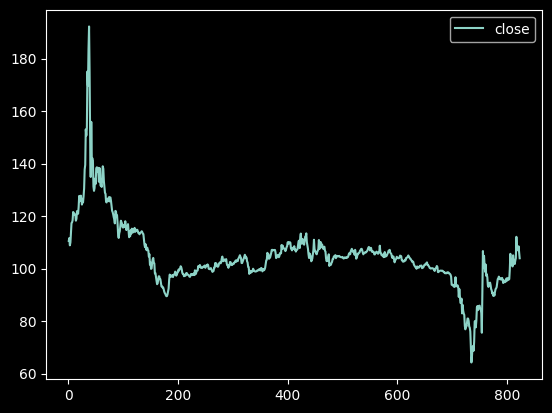

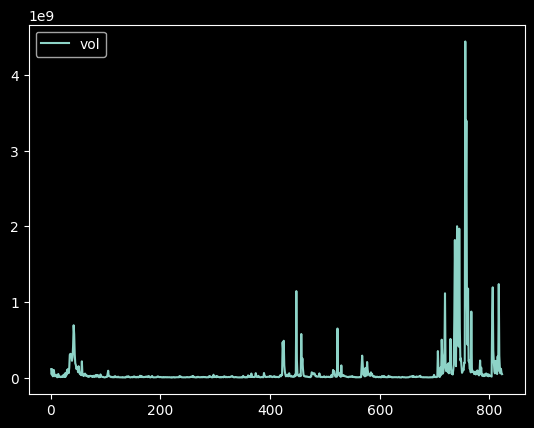

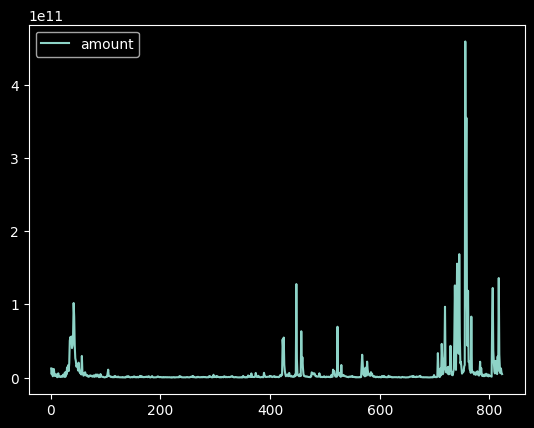

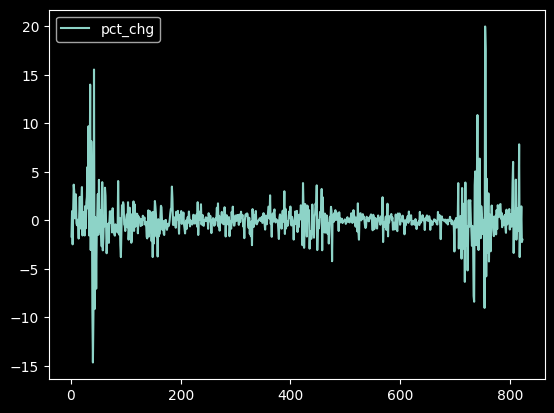

In [22]:
cols =  ['close', 'vol', 'amount', 'pct_chg']

for c in cols:
    df[[c]].plot()

### 时序混沌性
`Lyapunov`指数可以反映一个时间序列的动力学特性，例如稳定性、周期性、混沌性等。`Lyapunov` 指数描述了系统在相空间中相邻轨道间收敛或发散的平均指数率。

如果一个时间序列的最大 `Lyapunov` 指数为正，那么它表示系统是混沌的，即系统对初始条件非常敏感，难以预测。
如果最大`Lyapunov`指数为零，那么它表示系统是周期的，即系统有规律地重复自身的行为。
如果最大`Lyapunov`指数为负，那么它表示系统是稳定的，即系统趋向于一个平衡点或一个极限环。

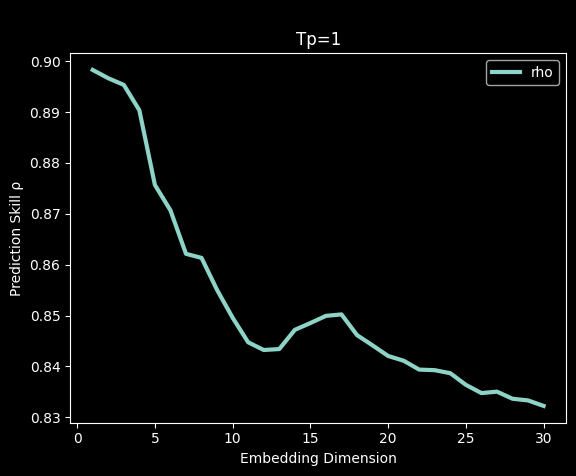

[Fit] close maximum Lyapunov exponent is -3.6974929928339457, embedding dim:[1], tau:1


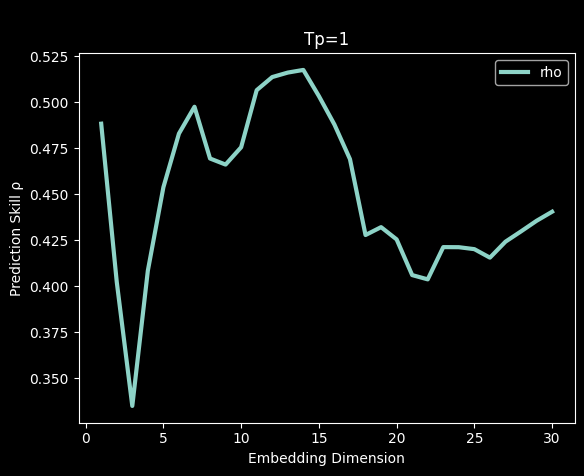

[Fit] vol maximum Lyapunov exponent is 17.50124483046085, embedding dim:[14], tau:1


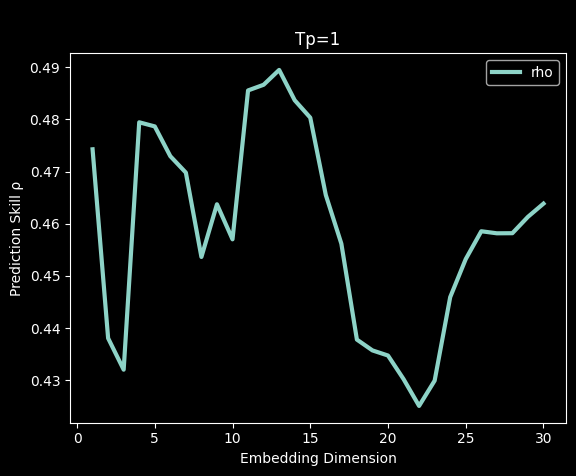

[Fit] amount maximum Lyapunov exponent is 22.068567447249226, embedding dim:[13], tau:1


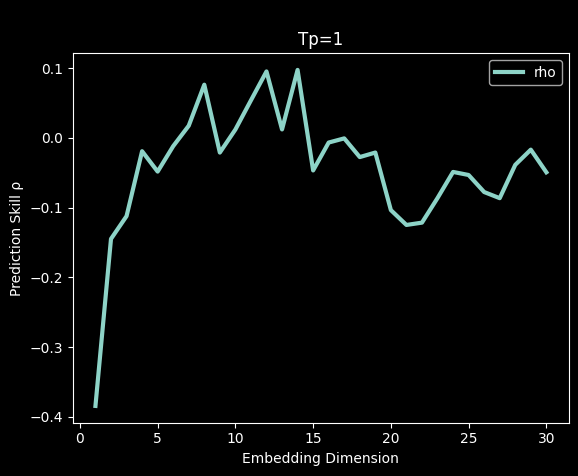

[Fit] pct_chg maximum Lyapunov exponent is 1.0045001876432418, embedding dim:[14], tau:1


In [30]:
# label = 'vol'
for label in cols:
    df_E = pyedm.EmbedDimension(
        dataFrame=df[['Time', label]], lib=[1, 500], pred=[501, 800],
        columns=label, target=label, maxE=30, tau=-1,
    )

    # print(df_E.head())
    ss = df_E[df_E.rho == df_E.rho.max()].iloc[-1]
    E = int(ss['E'])

    dim = [E]
    r = lyapunov.mle_embed(
        x=df[label].values,
        dim=dim,
    )
    print(f"[Fit] {label} maximum Lyapunov exponent is {r[0, 0]}, embedding dim:{dim}, tau:1")

### 时间序列平稳性检查

In [31]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [32]:
for c in cols:
    print('-'*20)
    print(c)
    check_stationarity(df[c])

--------------------
close
ADF Statistic: -2.458154
p-value: 0.125991
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Non-stationary
--------------------
vol
ADF Statistic: -3.358653
p-value: 0.012452
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Stationary
--------------------
amount
ADF Statistic: -4.216957
p-value: 0.000617
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Stationary
--------------------
pct_chg
ADF Statistic: -6.332271
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Stationary


### 格兰杰因果关系检验（Granger Causality Test）

由2003年诺贝尔经济学奖得主克莱夫·格兰杰（Clive W. J. Granger，1934—2009）提出，并由西蒙斯（1972 ,1980）发展，作为一种计量方法已经被经济学家们普遍接受并广泛使用。

格兰杰因果关系简单来说：通过比较“已知上一时刻所有信息，这一时刻X的概率分布情况”和“已知上一时刻除Y以外的所有信息，这一时刻X的概率分布情况”，来判断Y对X是否存在因果关系。它的主要使用方式在于以此定义进行假设检验，从而判断X与Y是否存在因果关系，该检验称为格兰杰因果关系检验。

#### 格兰杰检验的前提条件？——时间序列平稳
进行格兰杰因果关系检验的一个前提条件是时间序列必须具有平稳性，否则可能会出现虚假回归问题。检验平稳性用单位根检验。

所以，一般的处理程序是：对时间序列数据做单位根检验，如果不存在单位根，则时间序列平稳。继续对时间序列数据做格兰杰检验，检验其变量之间的因果关系。

>最近，以Peter Phillips的一论文为理论基础，人们也开始在实证中用格兰杰检验处理非平稳数据，这也是可以的。

#### 格兰杰检验不成立的意义——不表示X和Y之间无因果关系
格兰杰因果检验是检验统计上的时间先后顺序，并不表示而这真正存在因果关系，是否呈因果关系需要根据理论、经验和模型来判定。

若X都不是Y的格兰杰原因，这并不是说X与Y之间毫无关系。格兰杰因果检验本身也不是真实意义上检验变量的因果关系，而只是检验变量在统计上的时间先后顺序。

格兰杰检验的因果关系并非我们通常理解的因与果的关系，而是说x的前期变化能有效地解释y的变化，所以称其为“格兰杰原因”。

-------------------------------------
statsmodel grangercausalitytests 方法接收一个包含2列的2维的数组作为主要参数：

* 第一列是当前要预测未来值的序列A，第二列是另一个序列B,该方法就是看B对A的预测是否有帮助。该方法的零假设是：B对A没有帮助。如果所有检验下的P-Values都小于显著水平0.05，则可以拒绝零假设，并推断出B确实对A的预测有用。

* 第二个参数maxlag是设定测试用的lags的最大值。


In [33]:
# 除了 lag 2 的 p 值大于5%, 其他都小于5%, 可以说 close 对 pct_chg 的预测有用
grangercausalitytests(df[['pct_chg', 'close']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2525  , p=0.0126  , df_denom=819, df_num=1
ssr based chi2 test:   chi2=6.2754  , p=0.0122  , df=1
likelihood ratio test: chi2=6.2516  , p=0.0124  , df=1
parameter F test:         F=6.2525  , p=0.0126  , df_denom=819, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5898  , p=0.0757  , df_denom=816, df_num=2
ssr based chi2 test:   chi2=5.2113  , p=0.0739  , df=2
likelihood ratio test: chi2=5.1949  , p=0.0745  , df=2
parameter F test:         F=2.5898  , p=0.0757  , df_denom=816, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6959  , p=0.0449  , df_denom=813, df_num=3
ssr based chi2 test:   chi2=8.1575  , p=0.0429  , df=3
likelihood ratio test: chi2=8.1171  , p=0.0437  , df=3
parameter F test:         F=2.6959  , p=0.0449  , df_denom=813, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9100  , p=0.0208  

{1: ({'ssr_ftest': (6.252538504546687, 0.01259593979948706, 819.0, 1),
   'ssr_chi2test': (6.275441575991913, 0.012242261013882885, 1),
   'lrtest': (6.251608319069419, 0.012408059469352643, 1),
   'params_ftest': (6.252538504546583, 0.012595939799489007, 819.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5898054609309082, 0.0756513039171745, 816.0, 2),
   'ssr_chi2test': (5.211348733883028, 0.07385331616567227, 2),
   'lrtest': (5.194878712815807, 0.07446401008647358, 2),
   'params_ftest': (2.5898054609311494, 0.07565130391715344, 816.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.6959398776126613, 0.044933039517974074, 813.0, 3),
   'ssr_chi2test': (8.157456456244953, 0.042867208851613665, 3),
   'lrtest': (8.117147897126415, 0.0436516498395523, 3),
   'params_ftest': (2.6959398776118895, 0.04493303951801971, 813.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [34]:
grangercausalitytests(df[['close', 'vol']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9366  , p=0.0086  , df_denom=819, df_num=1
ssr based chi2 test:   chi2=6.9620  , p=0.0083  , df=1
likelihood ratio test: chi2=6.9327  , p=0.0085  , df=1
parameter F test:         F=6.9366  , p=0.0086  , df_denom=819, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0397  , p=0.0067  , df_denom=816, df_num=2
ssr based chi2 test:   chi2=10.1412 , p=0.0063  , df=2
likelihood ratio test: chi2=10.0791 , p=0.0065  , df=2
parameter F test:         F=5.0397  , p=0.0067  , df_denom=816, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1824  , p=0.0234  , df_denom=813, df_num=3
ssr based chi2 test:   chi2=9.6294  , p=0.0220  , df=3
likelihood ratio test: chi2=9.5733  , p=0.0226  , df=3
parameter F test:         F=3.1824  , p=0.0234  , df_denom=813, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6019  , p=0.0349  

{1: ({'ssr_ftest': (6.936626492312077, 0.008604145073791482, 819.0, 1),
   'ssr_chi2test': (6.9620353805623045, 0.008325726672456379, 1),
   'lrtest': (6.932717873367437, 0.008463298107529537, 1),
   'params_ftest': (6.936626495326969, 0.008604145059412708, 819.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.039706896206187, 0.006678678977515854, 816.0, 2),
   'ssr_chi2test': (10.14117490633647, 0.0062787305970084225, 2),
   'lrtest': (10.07905292040141, 0.0064768146217197954, 2),
   'params_ftest': (5.039707821871237, 0.006678672870731265, 816.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.182383259483179, 0.023359495649576303, 813.0, 3),
   'ssr_chi2test': (9.629351560059803, 0.021994355702622623, 3),
   'lrtest': (9.573251053990134, 0.022564726029306377, 3),
   'params_ftest': (3.182382647945302, 0.02335951497493306, 813.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [35]:
grangercausalitytests(df[['pct_chg', 'vol']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8486  , p=0.0158  , df_denom=819, df_num=1
ssr based chi2 test:   chi2=5.8700  , p=0.0154  , df=1
likelihood ratio test: chi2=5.8491  , p=0.0156  , df=1
parameter F test:         F=5.8486  , p=0.0158  , df_denom=819, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4744  , p=0.0314  , df_denom=816, df_num=2
ssr based chi2 test:   chi2=6.9915  , p=0.0303  , df=2
likelihood ratio test: chi2=6.9619  , p=0.0308  , df=2
parameter F test:         F=3.4744  , p=0.0314  , df_denom=816, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1374  , p=0.0941  , df_denom=813, df_num=3
ssr based chi2 test:   chi2=6.4674  , p=0.0910  , df=3
likelihood ratio test: chi2=6.4420  , p=0.0920  , df=3
parameter F test:         F=2.1374  , p=0.0941  , df_denom=813, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7479  , p=0.1375  

{1: ({'ssr_ftest': (5.848555507441959, 0.015807001351958595, 819.0, 1),
   'ssr_chi2test': (5.869978787688999, 0.015401237465154748, 1),
   'lrtest': (5.849119003160013, 0.015584851438671353, 1),
   'params_ftest': (5.848555507441708, 0.015807001351960028, 819.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.4744442450649666, 0.03143812744711415, 816.0, 2),
   'ssr_chi2test': (6.991467463721416, 0.03032648876027716, 2),
   'lrtest': (6.961866444952193, 0.0307786742753245, 2),
   'params_ftest': (3.4744440828389767, 0.0314381325041298, 816.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.137381656213183, 0.09406528974384895, 813.0, 3),
   'ssr_chi2test': (6.467354088910738, 0.090958907457134, 3),
   'lrtest': (6.441983334905672, 0.0919788339113087, 3),
   'params_ftest': (2.1373815973859878, 0.09406529697947381, 813.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

### CCM 因果推断
Apply convergent cross mapping to pairs of variables to infer possible causal links between variables.

https://www.youtube.com/embed/NrFdIz-D2yM?si=sERbrYIooJOvquYz

In [40]:
df[ccm_cols]

,close,pct_chg
1,110.580,-1.662961
2,111.640,0.958582
3,108.880,-2.472232
4,109.950,0.982733
5,114.000,3.683492
...,...,...
819,107.453,-0.392117
820,106.949,-0.469042
821,108.496,1.446484
822,106.069,-2.236949


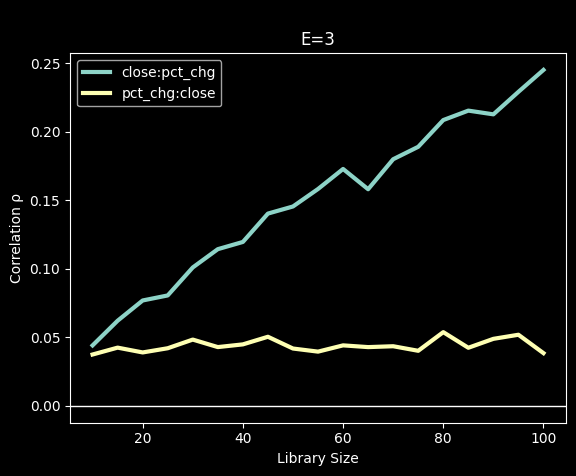

,LibSize,close:pct_chg,pct_chg:close
0,10.0,0.044155,0.037504
1,15.0,0.062153,0.042517
2,20.0,0.076926,0.039017
3,25.0,0.080595,0.042074
4,30.0,0.101004,0.048392
5,35.0,0.114348,0.042921
6,40.0,0.119608,0.044892
7,45.0,0.140304,0.050447
8,50.0,0.145490,0.041866
9,55.0,0.158246,0.039603


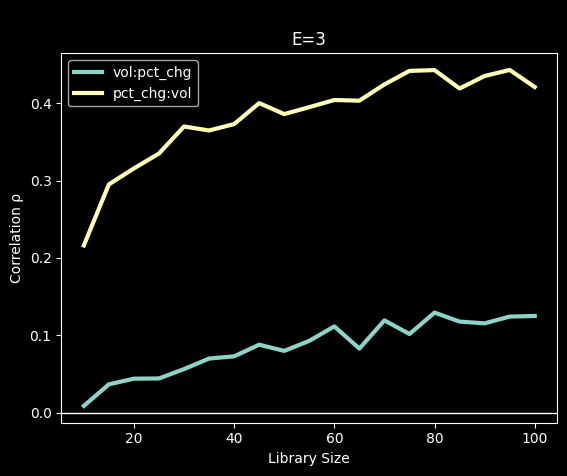

,LibSize,vol:pct_chg,pct_chg:vol
0,10.0,0.008535,0.216083
1,15.0,0.036458,0.295061
2,20.0,0.043767,0.315750
3,25.0,0.044058,0.334970
4,30.0,0.056177,0.369943
5,35.0,0.069801,0.364806
6,40.0,0.072690,0.373069
7,45.0,0.087715,0.400202
8,50.0,0.079698,0.385970
9,55.0,0.092687,0.394946


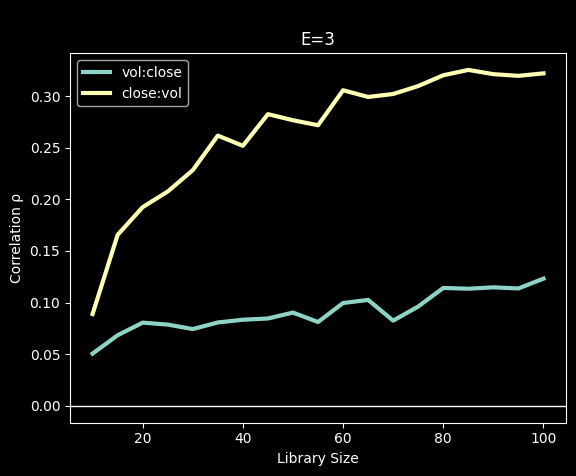

,LibSize,vol:close,close:vol
0,10.0,0.050642,0.088926
1,15.0,0.068411,0.165561
2,20.0,0.080617,0.192431
3,25.0,0.078746,0.207552
4,30.0,0.074396,0.228203
5,35.0,0.080810,0.261687
6,40.0,0.083421,0.251773
7,45.0,0.084637,0.282434
8,50.0,0.090363,0.276561
9,55.0,0.081232,0.271706


In [52]:
# E = 3, close , pct_chg
# 通过结果显示 close -> pct_chg, 符合前面格兰杰因果检验结果

for c in [
    ['close', "pct_chg"], 
    ['vol', "pct_chg"],
    ['vol', "close"],
]:
    _, x_col, target = ccm_cols =  ['Time'] + c

    # use different parameter E dim
    ccm = pyedm.CCM(
        dataFrame=df[ccm_cols], E=3,
        columns=x_col, target=target,
        libSizes="10 100 5", sample=100, showPlot=True
    )
    display(ccm)